In [1]:
import qiskit
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

In [2]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

In [3]:
# original circuit
circuit = QuantumCircuit(q,c)
circuit.rx(pi/4,0)
circuit.cx(0,1)
circuit.barrier(1)
circuit.h(1)
circuit.cx(1,2)
circuit.measure(0,0)
circuit.measure(1,1)
circuit.measure(2,2)
circuit.draw()

┌─────────┐        ┌─┐                
q0_0: ┤ Rx(π/6) ├──■─────┤M├────────────────
      └─────────┘┌─┴─┐ ░ └╥┘┌───┐     ┌─┐   
q0_1: ───────────┤ X ├─░──╫─┤ H ├──■──┤M├───
                 └───┘ ░  ║ └───┘┌─┴─┐└╥┘┌─┐
q0_2: ────────────────────╫──────┤ X ├─╫─┤M├
                          ║      └───┘ ║ └╥┘
c0: 3/════════════════════╩════════════╩══╩═
                          0            1  2

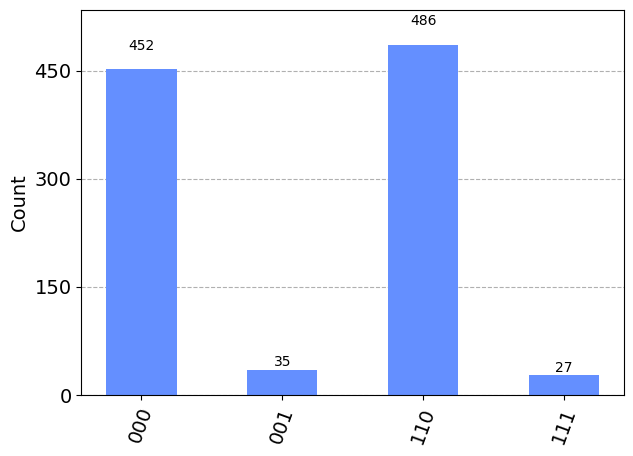

In [4]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [5]:
# subcircuit 1
q1 = QuantumRegister(2)
c1 = ClassicalRegister(2)
sub1 = QuantumCircuit(q1, c1)
sub1.rx(pi/4,0)
sub1.cx(0,1)
sub1.measure(0,0)
sub1.measure(1,1)
sub1.draw()

┌─────────┐     ┌─┐   
q6_0: ┤ Rx(π/6) ├──■──┤M├───
      └─────────┘┌─┴─┐└╥┘┌─┐
q6_1: ───────────┤ X ├─╫─┤M├
                 └───┘ ║ └╥┘
c1: 2/═════════════════╩══╩═
                       0  1

In [6]:
job = execute(sub1, simulator, shots = 1000)
result = job.result()
counts_z = result.get_counts()
if '00' not in counts_z.keys():
    counts_z.update({'00':0})
if '01' not in counts_z.keys():
    counts_z.update({'01':0})
if '10' not in counts_z.keys():
    counts_z.update({'10':0})
if '11' not in counts_z.keys():
    counts_z.update({'11':0})
sub1.clear()

In [7]:
sub1.rx(pi/4,0)
sub1.cx(0,1)
sub1.h(1)
sub1.measure(0,0)
sub1.measure(1,1)
sub1.draw()

┌─────────┐          ┌─┐   
q6_0: ┤ Rx(π/6) ├──■───────┤M├───
      └─────────┘┌─┴─┐┌───┐└╥┘┌─┐
q6_1: ───────────┤ X ├┤ H ├─╫─┤M├
                 └───┘└───┘ ║ └╥┘
c1: 2/══════════════════════╩══╩═
                            0  1

In [8]:
job = execute(sub1, simulator, shots = 1000)
result = job.result()
counts_x = result.get_counts()
if '00' not in counts_x.keys():
    counts_x.update({'00':0})
if '01' not in counts_x.keys():
    counts_x.update({'01':0})
if '10' not in counts_x.keys():
    counts_x.update({'10':0})
if '11' not in counts_x.keys():
    counts_x.update({'11':0})
sub1.clear()

In [9]:
sub1.rx(pi/4,0)
sub1.cx(0,1)
sub1.sdg(1)
sub1.h(1)
sub1.measure(0,0)
sub1.measure(1,1)
sub1.draw()

┌─────────┐            ┌─┐        
q6_0: ┤ Rx(π/6) ├──■─────────┤M├────────
      └─────────┘┌─┴─┐┌─────┐└╥┘┌───┐┌─┐
q6_1: ───────────┤ X ├┤ Sdg ├─╫─┤ H ├┤M├
                 └───┘└─────┘ ║ └───┘└╥┘
c1: 2/════════════════════════╩═══════╩═
                              0       1

In [10]:
job = execute(sub1, simulator, shots = 1000)
result = job.result()
counts_y = result.get_counts()
if '00' not in counts_y.keys():
    counts_y.update({'00':0})
if '01' not in counts_y.keys():
    counts_y.update({'01':0})
if '10' not in counts_y.keys():
    counts_y.update({'10':0})
if '11' not in counts_y.keys():
    counts_y.update({'11':0})
sub1.clear()

In [11]:
q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
sub2 = QuantumCircuit(q2, c2)
sub2.h(0)
sub2.cx(0,1)
sub2.measure(0,0)
sub2.measure(1,1)
sub2.draw()

┌───┐     ┌─┐   
q19_0: ┤ H ├──■──┤M├───
       └───┘┌─┴─┐└╥┘┌─┐
q19_1: ─────┤ X ├─╫─┤M├
            └───┘ ║ └╥┘
 c2: 2/═══════════╩══╩═
                  0  1

In [12]:
job = execute(sub2, simulator, shots = 1000)
result = job.result()
counts_0 = result.get_counts()
if '00' not in counts_0.keys():
    counts_0.update({'00':0})
if '01' not in counts_0.keys():
    counts_0.update({'01':0})
if '10' not in counts_0.keys():
    counts_0.update({'10':0})
if '11' not in counts_0.keys():
    counts_0.update({'11':0})
sub2.clear()

In [13]:
sub2.x(0)
sub2.h(0)
sub2.cx(0,1)
sub2.measure(0,0)
sub2.measure(1,1)
sub2.draw()

┌───┐┌───┐     ┌─┐   
q19_0: ┤ X ├┤ H ├──■──┤M├───
       └───┘└───┘┌─┴─┐└╥┘┌─┐
q19_1: ──────────┤ X ├─╫─┤M├
                 └───┘ ║ └╥┘
 c2: 2/════════════════╩══╩═
                       0  1

In [14]:
job = execute(sub2, simulator, shots = 1000)
result = job.result()
counts_1 = result.get_counts()
if '00' not in counts_1.keys():
    counts_1.update({'00':0})
if '01' not in counts_1.keys():
    counts_1.update({'01':0})
if '10' not in counts_1.keys():
    counts_1.update({'10':0})
if '11' not in counts_1.keys():
    counts_1.update({'11':0})
sub2.clear()

In [15]:
sub2.cx(0,1)
sub2.measure(0,0)
sub2.measure(1,1)
sub2.draw()

┌─┐   
q19_0: ──■──┤M├───
       ┌─┴─┐└╥┘┌─┐
q19_1: ┤ X ├─╫─┤M├
       └───┘ ║ └╥┘
 c2: 2/══════╩══╩═
             0  1

In [16]:
job = execute(sub2, simulator, shots = 1000)
result = job.result()
counts_p = result.get_counts()
if '00' not in counts_p.keys():
    counts_p.update({'00':0})
if '01' not in counts_p.keys():
    counts_p.update({'01':0})
if '10' not in counts_p.keys():
    counts_p.update({'10':0})
if '11' not in counts_p.keys():
    counts_p.update({'11':0})
sub2.clear()

In [17]:
sub2.rx(-pi/2,0)
sub2.h(0)
sub2.cx(0,1)
sub2.measure(0,0)
sub2.measure(1,1)
sub2.draw()

┌──────────┐┌───┐     ┌─┐   
q19_0: ┤ Rx(-π/2) ├┤ H ├──■──┤M├───
       └──────────┘└───┘┌─┴─┐└╥┘┌─┐
q19_1: ─────────────────┤ X ├─╫─┤M├
                        └───┘ ║ └╥┘
 c2: 2/═══════════════════════╩══╩═
                              0  1

In [18]:
job = execute(sub2, simulator, shots = 1000)
result = job.result()
counts_i = result.get_counts()
if '00' not in counts_i.keys():
    counts_i.update({'00':0})
if '01' not in counts_i.keys():
    counts_i.update({'01':0})
if '10' not in counts_i.keys():
    counts_i.update({'10':0})
if '11' not in counts_i.keys():
    counts_i.update({'11':0})
sub2.clear()

0.935424 0.0 -0.02738399999999997 -0.0005439999999999991
0.0 0.0 -0.0 0.0
0.0 0.0 -0.0 0.0
0.9205760000000001 0.0 0.02738399999999997 0.0005439999999999991
0.0 0.07459199999999999 0.003912000000000003 0.000136
0.0 0.0 0.0 -0.0
0.0 0.0 0.0 -0.0
0.0 0.069408 -0.003912000000000003 -0.000136


<BarContainer object of 8 artists>

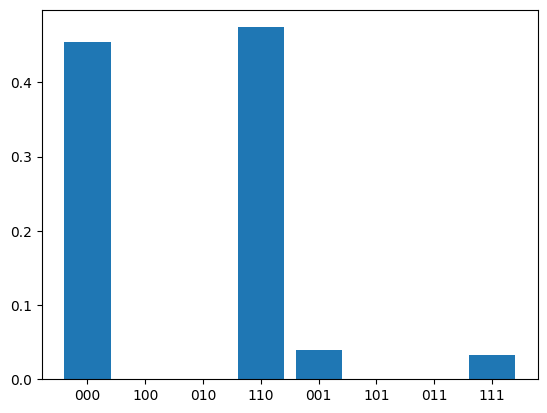

In [19]:
import matplotlib.pyplot as plt
state_prob = []
for states in ['000', '001', '010', '011', '100', '101', '110', '111']:
    string1 = '0'+states[0]
#     print(string1)
    sum1 = (counts_z[string1]/1000)*2 * (counts_0[states[::-1][:2]]/1000)
    string2 = '1'+states[0]
    sum2 = (counts_z[string2]/1000)*2 * (counts_1[states[::-1][:2]]/1000)
    sum3 = (counts_x[string1]/1000 - counts_x[string2]/1000) * (2*counts_p[states[::-1][:2]]/1000 - counts_0[states[::-1][:2]]/1000 - counts_1[states[::-1][:2]]/1000)
    sum4 = (counts_y[string1]/1000 - counts_y[string2]/1000) * (2*counts_i[states[::-1][:2]]/1000 - counts_0[states[::-1][:2]]/1000 - counts_1[states[::-1][:2]]/1000)
    sum = (sum1+sum2+sum3+sum4)/2
    print(sum1, sum2, sum3, sum4)
    state_prob.append(sum)
plt.bar(['000', '100', '010', '110', '001', '101', '011', '111'], state_prob)